<a href="https://colab.research.google.com/github/aminbaybon/Simple-Text-Classification-using-CNN-and-RNN/blob/main/Text_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D , Conv1D , MaxPooling1D, Embedding , LSTM
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"] , axis= 1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.columns = ['s_or_h', 'text']

In [8]:
df['labels'] = df['s_or_h'].map({'ham' : 0  , 'spam' : 1})

In [9]:
df

,s_or_h,text,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
x_train,x_test,y_train, y_test = train_test_split(df['text'] , df['labels'].values , test_size = 0.3)

In [11]:
maxvocab = 20000
tokenizer = Tokenizer(num_words = maxvocab)

In [12]:
 tokenizer.fit_on_texts(x_train)

In [13]:
s1 = tokenizer.texts_to_sequences(x_train)
s2 = tokenizer.texts_to_sequences(x_test)

In [14]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
s1[0]

[133, 196, 1011, 5, 20, 1012, 18, 678, 408]

In [17]:
len(s1[0])

9

In [18]:
word2idx= tokenizer.word_index
V=len(word2idx)
print('total numner token' , V)

total numner token 7497


In [19]:
train_data = pad_sequences(s1)

In [20]:
train_data

array([[   0,    0,    0, ...,   18,  678,  408],
       [   0,    0,    0, ..., 1297,  449,  224],
       [   0,    0,    0, ...,    8,  123, 3529],
       ...,
       [   0,    0,    0, ...,   64,    6,   77],
       [   0,    0,    0, ...,   72,  724,   64],
       [   0,    0,    0, ..., 1841, 1842,  179]], dtype=int32)

In [25]:
train_data.shape

(3900, 189)

In [26]:
T= train_data.shape[1]

In [27]:
test_data = pad_sequences(s2, maxlen=T)

In [35]:
test_data.shape

(1672, 189)

In [29]:
D =20
i = Input(shape= (T,))
x= Embedding (V+1 ,D)(i)
x = Conv1D(32 , 3 , activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D (64 , 3 , activation = 'relu' )(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128 , 3 , activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1 , activation = 'sigmoid')(x)

model = Model(i,x)

In [30]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [37]:
r = model.fit(x = train_data ,y = y_train, epochs = 10 , validation_data=(test_data , y_test))

Epoch 1/10
122/122 [==============================] - 4s 19ms/step - loss: 0.3779 - accuracy: 0.8644 - val_loss: 0.2545 - val_accuracy: 0.8636
Epoch 2/10
122/122 [==============================] - 2s 18ms/step - loss: 0.0972 - accuracy: 0.9664 - val_loss: 0.1145 - val_accuracy: 0.9683
Epoch 3/10
122/122 [==============================] - 3s 23ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0701 - val_accuracy: 0.9844
Epoch 4/10
122/122 [==============================] - 3s 23ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0797 - val_accuracy: 0.9844
Epoch 5/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9844
Epoch 6/10
122/122 [==============================] - 2s 18ms/step - loss: 6.6213e-04 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9850
Epoch 7/10
122/122 [==============================] - 2s 18ms/step - loss: 3.6917e-04 - accuracy: 1.0000 - val_loss: 0.0877 - val_accuracy

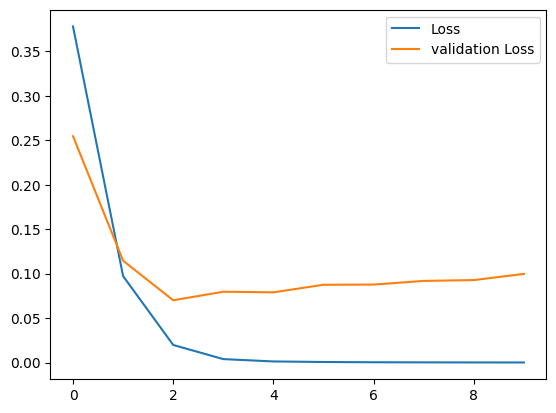

In [38]:
plt.plot(r.history['loss'] , label='Loss')
plt.plot(r.history['val_loss'] , label='validation Loss')
plt.legend()
plt.show()

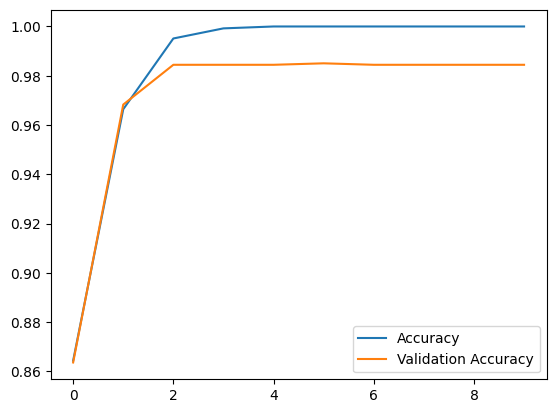

In [39]:
plt.plot(r.history['accuracy'] , label='Accuracy')
plt.plot(r.history['val_accuracy'] , label='Validation Accuracy')
plt.legend()
plt.show()

In [42]:
M =15
i = Input(shape= (T,))
x= Embedding (V+1 ,D)(i)
x = LSTM(M , return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1 , activation='sigmoid')(x)
model = Model(i ,x)

In [43]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [44]:
r = model.fit(x = train_data ,y = y_train, epochs = 10 , validation_data=(test_data , y_test))

Epoch 1/10
122/122 [==============================] - 17s 116ms/step - loss: 0.4490 - accuracy: 0.8664 - val_loss: 0.3960 - val_accuracy: 0.8636
Epoch 2/10
122/122 [==============================] - 12s 98ms/step - loss: 0.3824 - accuracy: 0.8669 - val_loss: 0.3717 - val_accuracy: 0.8636
Epoch 3/10
122/122 [==============================] - 11s 87ms/step - loss: 0.2866 - accuracy: 0.8846 - val_loss: 0.1888 - val_accuracy: 0.9516
Epoch 4/10
122/122 [==============================] - 11s 90ms/step - loss: 0.0936 - accuracy: 0.9872 - val_loss: 0.0857 - val_accuracy: 0.9779
Epoch 5/10
122/122 [==============================] - 12s 96ms/step - loss: 0.0373 - accuracy: 0.9938 - val_loss: 0.0704 - val_accuracy: 0.9803
Epoch 6/10
122/122 [==============================] - 11s 89ms/step - loss: 0.0217 - accuracy: 0.9969 - val_loss: 0.0594 - val_accuracy: 0.9856
Epoch 7/10
122/122 [==============================] - 10s 78ms/step - loss: 0.0145 - accuracy: 0.9987 - val_loss: 0.0578 - val_accuracy

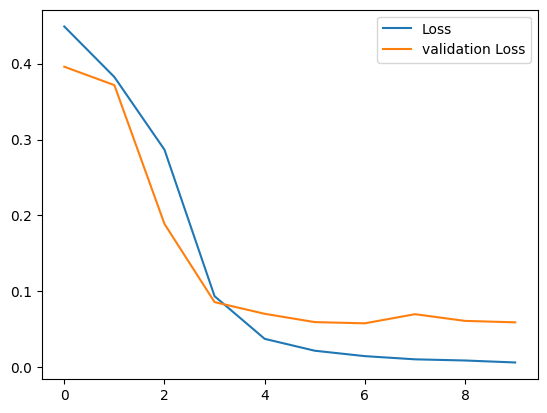

In [45]:
plt.plot(r.history['loss'] , label='Loss')
plt.plot(r.history['val_loss'] , label='validation Loss')
plt.legend()
plt.show()

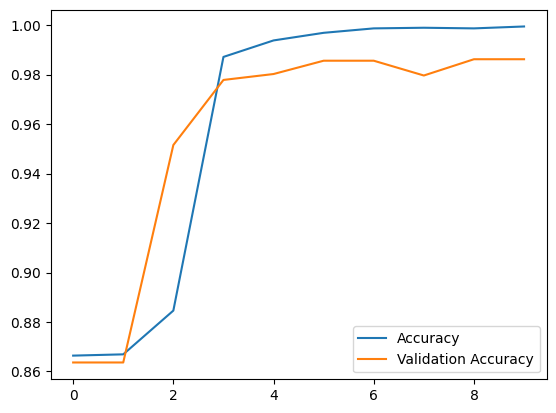

In [46]:
plt.plot(r.history['accuracy'] , label='Accuracy')
plt.plot(r.history['val_accuracy'] , label='Validation Accuracy')
plt.legend()
plt.show()